In [1]:
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import datetime
import collections
from collections import Counter
import glob

In [ ]:
import time
import glob
import numpy as np 
import pandas as pd
import os
from multiprocessing import Pool
import dask.dataframe as dd

#readcsv_dask_map_multi
def readcsv_dask_map_multi(fileslist):
    p = Pool(os.cpu_count())
    df = pd.concat(p.map(ddreadcsv, fileslist))
    p.close()
    return df

# 並列化読み込み関数 dd
def ddreadcsv(csv_path):
    return dd.read_csv(csv_path).compute()

  
if __name__ == "__main__":
    
    allfiles = sorted(glob.glob('*.csv', recursive=True))
    
    start = time.time()
    df = readcsv_dask_map_multi(allfiles)
    process_time = time.time() - start
    print('csv読み込み時間：{:.3f}s'.format(process_time))

In [8]:
# パスで指定したファイルの一覧をリスト形式で取得. （ここでは一階層下のtestファイル以下）
csv_files = glob.glob('20210612/*.csv')

#読み込むファイルのリストを表示
for a in csv_files:
    print(a)

#csvファイルの中身を追加していくリストを用意
data_list = []

#読み込むファイルのリストを走査
for file in csv_files:
    data_list.append(pd.read_csv(file))

#リストを全て行方向に結合
#axis=0:行方向に結合, sort
df = pd.concat(data_list,  sort=False)

df.to_csv("total0612.csv",index=False)

20210612/rsdata_20210612_141850.csv
20210612/rsdata_20210612_180003.csv
20210612/rsdata_20210612_182600.csv
20210612/rsdata_20210612_165514.csv
20210612/rsdata_20210612_135451.csv
20210612/rsdata_20210612_113333.csv
20210612/rsdata_20210612_104049.csv
20210612/rsdata_20210612_175317.csv
20210612/rsdata_20210612_135055.csv
20210612/rsdata_20210612_201412.csv
20210612/rsdata_20210612_103041.csv
20210612/rsdata_20210612_172041.csv
20210612/rsdata_20210612_153258.csv
20210612/rsdata_20210612_121433.csv
20210612/rsdata_20210612_161956.csv
20210612/rsdata_20210612_155211.csv
20210612/rsdata_20210612_191723.csv
20210612/rsdata_20210612_180612.csv
20210612/rsdata_20210612_124600.csv
20210612/rsdata_20210612_084139.csv
20210612/rsdata_20210612_122649.csv
20210612/rsdata_20210612_211005.csv
20210612/rsdata_20210612_153705.csv
20210612/rsdata_20210612_142543.csv
20210612/rsdata_20210612_173013.csv
20210612/rsdata_20210612_183109.csv
20210612/rsdata_20210612_181642.csv
20210612/rsdata_20210612_110

In [2]:
#csvの読み込み
df_timeid = pd.read_csv('total0612.csv', header=None, usecols=[0,1])
df_timeid.columns = ['Time', 'Id']
print(df_timeid)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                               Time       Id
0        2021-06-12 14:14:08.024318  20394.0
1        2021-06-12 14:14:08.024318  20390.0
2        2021-06-12 14:14:08.024318  20399.0
3        2021-06-12 14:14:08.154687  20394.0
4        2021-06-12 14:14:08.154687  20399.0
...                             ...      ...
1380151                         NaN      NaN
1380152                         NaN      NaN
1380153                         NaN      NaN
1380154                         NaN      NaN
1380155                         NaN      NaN

[1380156 rows x 2 columns]


In [ ]:
#IDごとにまとめる
df_timeid = df_timeid.sort_values(['Id', 'Time'])
all_dict = {}

for id in sorted(set(df_timeid['Id'])):
    #print('id', id)
    #print(df_timeid[df_timeid['Id'] == id])
    all_dict[id] = df_timeid[df_timeid['Id'] == id]

In [7]:
#滞在時間を計算
#print(all_dict[26]["Time"].iloc[0])
#print(all_dict[26]["Time"].iloc[-1])

start = datetime.datetime.strptime(all_dict[26]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
end = datetime.datetime.strptime(all_dict[26]["Time"].iloc[-1].split(".")[0], "%Y-%m-%d %H:%M:%S")
print(start,end,(end-start).seconds)

2021-06-10 15:56:06 2021-06-10 15:58:41 155


In [68]:
#list_time内に滞在時間を格納(3秒以下は削除)
time_dict={}
time_dictx={}
for id in all_dict:
        start = datetime.datetime.strptime(all_dict[id]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
        end = datetime.datetime.strptime(all_dict[id]["Time"].iloc[-1].split(".")[0], "%Y-%m-%d %H:%M:%S")
        #print(start,end,(end-start).seconds)
        T = (end - start).seconds
        if T < 3:
            id = 0
        else:
            time_dict[id] = T
print(time_dict)

{26: 155, 123: 37, 178: 30, 180: 20, 198: 4, 200: 31, 204: 127, 205: 5, 208: 119, 210: 94, 211: 5, 213: 6, 214: 3, 215: 15, 227: 18, 229: 79, 233: 5, 234: 10, 236: 61, 241: 8, 242: 25, 244: 3, 246: 8, 254: 8, 255: 3}


In [104]:
#分毎の訪問者数
start_list = []
start_taime = []
for id in time_dict:
        start = datetime.datetime.strptime(all_dict[id]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
        start_list.append(start.strftime("%Y/%m/%d %H:%M"))
c = collections.Counter(start_list)
print(c)
df_visitor = pd.DataFrame.from_dict(c, orient='index').reset_index()
df_visitor.columns = ['Time', 'Visitor']
df_visitor

Counter({'2021/06/10 15:56': 11, '2021/06/10 15:57': 8, '2021/06/10 15:58': 6})


,Time,Visitor
0,2021/06/10 15:56,11
1,2021/06/10 15:57,8
2,2021/06/10 15:58,6


<AxesSubplot:xlabel='Time'>

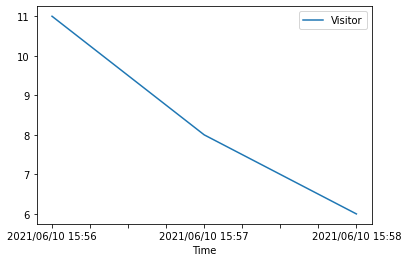

In [108]:
df_visitor.plot(x='Time', y='Visitor')